In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [8]:
filename = "./datasets/german_data.csv"
dataset = pd.read_csv(filename, delimiter=";")

In [9]:
dataset.columns

Index(['status', 'duration', 'history', 'purpose', 'amount', 'savings',
       'employment_since', 'installment_rate', 'personal_status', 'debtors',
       'residence_since', 'property', 'age', 'installment_plans', 'housing',
       'credits_bank', 'job', 'liable_to_maintenance', 'telephone',
       'foreign_worker', 'risk'],
      dtype='object')

In [10]:
german_credit_columns = ["Status of existing checking account",
                         "Duration in month",
                         "Credit history",
                         "Purpose",
                         "Credit amount",
                         "Savings account or bonds",
                         "Present employment since",
                         "Install. rate (%) of disposable income",
                         "Personal status and sex",
                         "Other debtors or guarantors",
                         "Present residence since",
                         "Property",
                         "Age in years",
                         "Other installment plans",
                         "Housing",
                         "No. of existing credits at this bank",
                         "Job",
                         "No. people being liable for",
                         "Telephone",
                         "Foreign worker",
                         "Risk"]

In [13]:
dataset.columns = german_credit_columns

In [14]:
dataset

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account or bonds,Present employment since,Install. rate (%) of disposable income,Personal status and sex,Other debtors or guarantors,...,Property,Age in years,Other installment plans,Housing,No. of existing credits at this bank,Job,No. people being liable for,Telephone,Foreign worker,Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


# Analysis of values and corresponding feature intervals

In [15]:
for col in dataset.columns:
    s = col #Erro caso não atribua a uma var
    print(s, " - Existem ", dataset[s].unique().shape[0], "valores únicos e ", dataset[s].isnull().sum(), " valores vazios\n")
    print(dataset[s].unique(), "\n")
    print(dataset[s].value_counts(), "\n")
    print("\n________________\n")

Status of existing checking account  - Existem  4 valores únicos e  0  valores vazios

['A11' 'A12' 'A14' 'A13'] 

A14    394
A11    274
A12    269
A13     63
Name: Status of existing checking account, dtype: int64 


________________

Duration in month  - Existem  33 valores únicos e  0  valores vazios

[ 6 48 12 42 24 36 30 15  9 10  7 60 18 45 11 27  8 54 20 14 33 21 16  4
 47 13 22 39 28  5 26 72 40] 

24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
60     13
27     13
42     11
11      9
20      8
8       7
4       6
45      5
7       5
39      5
14      4
13      4
33      3
28      3
54      2
16      2
22      2
47      1
5       1
26      1
72      1
40      1
Name: Duration in month, dtype: int64 


________________

Credit history  - Existem  5 valores únicos e  0  valores vazios

['A34' 'A32' 'A33' 'A30' 'A31'] 

A32    530
A34    293
A33     88
A31     49
A30     40
Name: Credit history, dtype: int64 


________

## Resulting analysis
All features have a corresponding value when compared to the dictionary. There are some observations regarding feature values though:

1. Feature "Purpose" has a possible value "A47" (meaning "vacation"), however, no value in the dataset has this feature value
2. Feature "Personal status and sex" has a possible value "A95" (meaning "female: single"), but no value in the dataset has this feature value

These observations have no impact on the validity of the dataset.

In [16]:
dataset["Risk"].value_counts().sort_index()

1    700
2    300
Name: Risk, dtype: int64

# Data validity and possible values

This dataset, unlike Default Credit Card clients, has no issues regarding the validity of the dataset nor issues regarding the order of values

# Correlation matrix to determine if there are feature to remove

There isn't a presence of a pair of features with high correlation between one another, and so, there is no need to remove any feature.


C:\Users\RHINES~1\AppData\Local\Temp/ipykernel_2696/1689072026.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  feat_corr = dataset.corr()


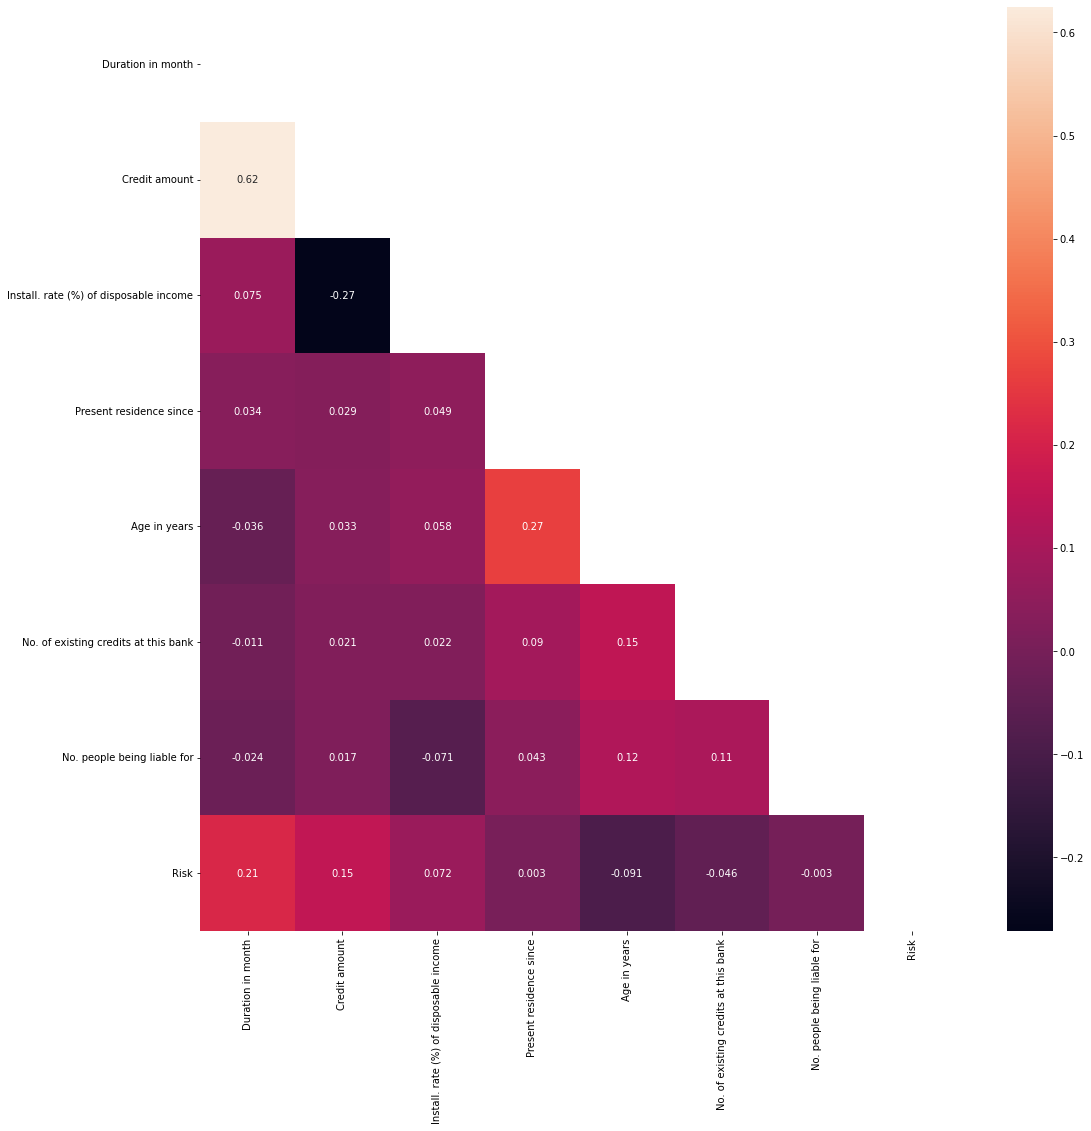

In [17]:
feat_corr = dataset.corr()
fig, ax = plt.subplots(figsize=(17, 17))
mask = np.triu(np.ones_like(feat_corr, dtype=bool))
sn.heatmap(feat_corr, mask = mask, annot=True, ax=ax)
plt.show()

# One-Hot Encoder for categorical features

There are several categorical features but we need to separate those in which the order matters from those where it does not.

Features where the order matters:
1. Status of existing checking account
2. Marital status
3. Credit history
4. Savings account or bonds
5. Present employment since
6. Other installment plans
7. Housing
8. Job

Features where the order does not matter and thus viable to treating with OHE:
1. Purpose
2. Personal status and sex
3. Other debtors or guarantors
4. Property
5. Telephone
6. Foreign worker

# Outlier identification by application of Inter-Quartile Range (IQR)

1. Present residence since
2. Age